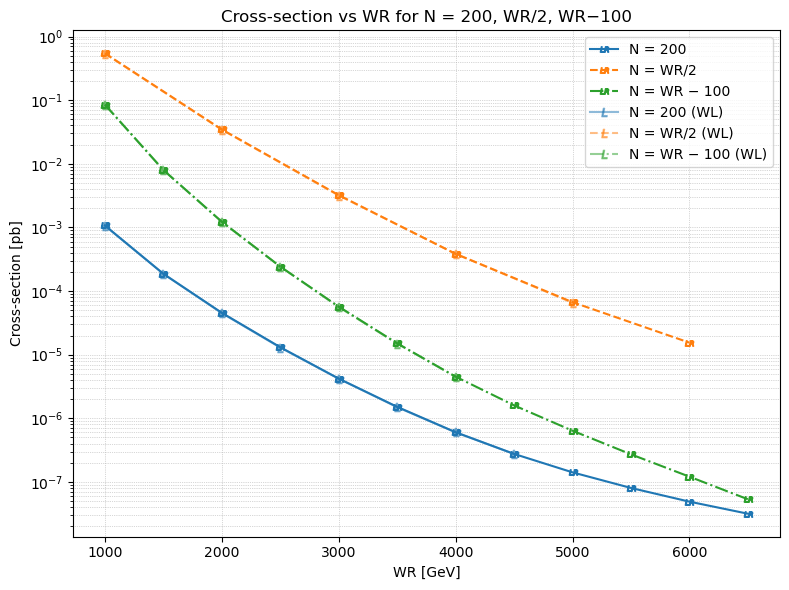

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. CSV 읽어오기 ───────────────────────────────────────────────────────────
# 실제 파일 경로를 본인의 환경에 맞게 수정하세요.
csv_path = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WR_WL_qq/tbchannel_crosssections.csv"
csv_path2 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WL_qq/tbchannel_crosssections.csv"
df = pd.read_csv(csv_path)
df2 = pd.read_csv(csv_path2)

# ─── 2. WR별로 조건에 맞는 N 값을 찾아서 별도 시리즈 생성 ────────────────────────
# 2-1) N = 200인 경우
df_N200 = df[df['N'] == 200].copy()
df2_N200 = df2[df2['N'] == 200].copy()
# 2-2) N = WR/2인 경우  → 즉 N * 2 == WR
df_WR2 = df[df['N'] * 2 == df['WR']].copy()
df2_WR2 = df2[df2['N'] * 2 == df2['WR']].copy()
# 2-3) N = WR - 100인 경우  → 즉 N == WR - 100
df_WR100 = df[df['N'] == df['WR'] - 100].copy()
df2_WR100 = df2[df2['N'] == df2['WR'] - 100].copy()
# ─── 3. WR값 오름차순으로 정렬 ───────────────────────────────────────────────────
df_N200   = df_N200.sort_values(by="WR")
df_WR2    = df_WR2.sort_values(by="WR")
df_WR100  = df_WR100.sort_values(by="WR")
df2_N200   = df2_N200.sort_values(by="WR")
df2_WR2    = df2_WR2.sort_values(by="WR")
df2_WR100  = df2_WR100.sort_values(by="WR")
# ─── 4. 한 플롯에 세 개의 곡선 그리기 ───────────────────────────────────────────
plt.figure(figsize=(8, 6))

# 4-1) N = 200
plt.plot(df_N200['WR'], df_N200['CrossSection'],
         marker='$LR$', linestyle='-', color='tab:blue', label='N = 200')
# 4-2) N = WR/2
plt.plot(df_WR2['WR'], df_WR2['CrossSection'],
         marker='$LR$', linestyle='--', color='tab:orange', label='N = WR/2')
# 4-3) N = WR - 100
plt.plot(df_WR100['WR'], df_WR100['CrossSection'],
         marker='$LR$', linestyle='-.', color='tab:green', label='N = WR − 100')

plt.plot(df2_N200['WR'], df2_N200['CrossSection'],
         marker='$L$', linestyle='-', color='tab:blue', label='N = 200 (WL)', alpha=0.5)
plt.plot(df2_WR2['WR'], df2_WR2['CrossSection'],
         marker='$L$', linestyle='--', color='tab:orange', label='N = WR/2 (WL)', alpha=0.5)
plt.plot(df2_WR100['WR'], df2_WR100['CrossSection'],
         marker='$L$', linestyle='-.', color='tab:green', label='N = WR − 100 (WL)', alpha=0.5)
# ─── 5. 그래프 꾸미기 ───────────────────────────────────────────────────────────
plt.xlabel('WR [GeV]')
plt.ylabel('Cross-section [pb]')
plt.title('Cross-section vs WR for N = 200, WR/2, WR−100')
plt.yscale('log')            # 필요에 따라 로그 스케일로 설정
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()

# ─── 6. 이미지 저장 및 표시 ────────────────────────────────────────────────────
# 파일로 저장하려면 uncomment:
# plt.savefig("/path/to/save/plot_crosssections.png", dpi=150)

plt.show()

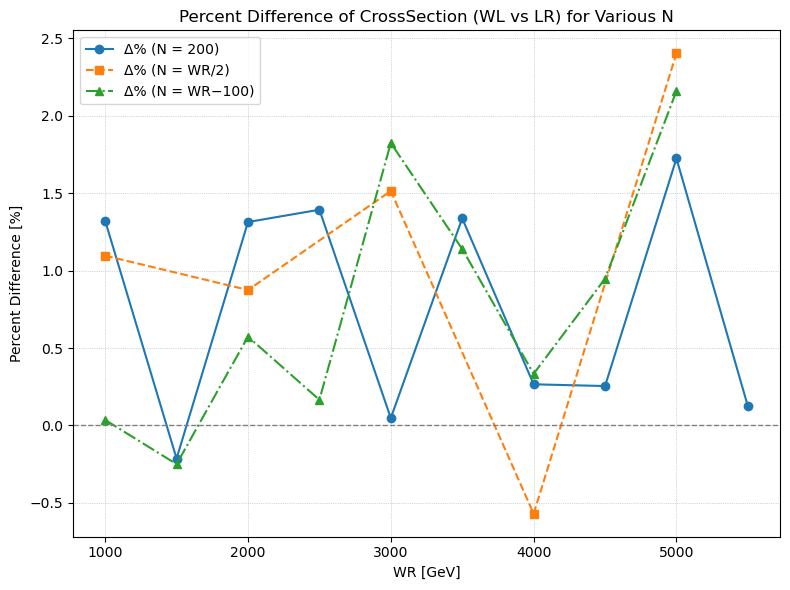

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─── 1. CSV 읽어오기 ───────────────────────────────────────────────────────────
csv_path1 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WR_WL_qq/tbchannel_crosssections.csv"
csv_path2 = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/analysis/result/t_WL_qq/tbchannel_crosssections.csv"
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)

# ─── 2. WR별로 조건에 맞는 N 값을 찾아서 별도 DataFrame 생성 ─────────────────────
# 2-1) N = 200인 경우
df1_N200 = df1[df1['N'] == 200].copy()
df2_N200 = df2[df2['N'] == 200].copy()

# 2-2) N = WR/2인 경우  → 즉 N * 2 == WR
df1_WR2 = df1[df1['N'] * 2 == df1['WR']].copy()
df2_WR2 = df2[df2['N'] * 2 == df2['WR']].copy()

# 2-3) N = WR - 100인 경우  → 즉 N == WR - 100
df1_WR100 = df1[df1['N'] == df1['WR'] - 100].copy()
df2_WR100 = df2[df2['N'] == df2['WR'] - 100].copy()

# ─── 3. 각 조건별로 DF 병합 후 퍼센트 차이 계산 ─────────────────────────────────
def compute_percent_diff(df_a, df_b):
    # 'WR'을 기준으로 inner join하여 두 개의 CrossSection 열을 가져옴
    merged = pd.merge(df_a[['WR', 'CrossSection']],
                      df_b[['WR', 'CrossSection']],
                      on='WR', suffixes=('_1', '_2'))
    # 퍼센트 차이 계산: (CS2 - CS1)/CS1 * 100
    merged['PercentDiff'] = (merged['CrossSection_1'] - merged['CrossSection_2']) / merged['CrossSection_2'] * 100
    return merged[['WR', 'PercentDiff']]

pd_N200_diff = compute_percent_diff(df1_N200, df2_N200)
pd_WR2_diff = compute_percent_diff(df1_WR2, df2_WR2)
pd_WR100_diff = compute_percent_diff(df1_WR100, df2_WR100)

# ─── 4. 퍼센트 차이 플롯 ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))

# N = 200인 경우
plt.plot(pd_N200_diff['WR'], pd_N200_diff['PercentDiff'],
         marker='o', linestyle='-', color='tab:blue', label='Δ% (N = 200)')

# N = WR/2인 경우
plt.plot(pd_WR2_diff['WR'], pd_WR2_diff['PercentDiff'],
         marker='s', linestyle='--', color='tab:orange', label='Δ% (N = WR/2)')

# N = WR - 100인 경우
plt.plot(pd_WR100_diff['WR'], pd_WR100_diff['PercentDiff'],
         marker='^', linestyle='-.', color='tab:green', label='Δ% (N = WR−100)')

# 그래프 꾸미기
plt.xlabel('WR [GeV]')
plt.ylabel('Percent Difference [%]')
plt.title('Percent Difference of CrossSection (WL vs LR) for Various N')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')  # 기준선 (0%) 표시
plt.legend()
plt.tight_layout()

# 이미지 저장 (필요 시)
# plt.savefig("/path/to/save/percent_diff_plot.png", dpi=150)

plt.show()

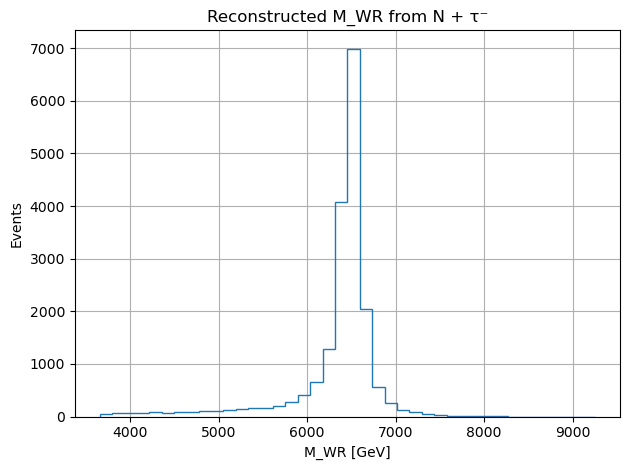

In [ ]:
#!/usr/bin/env python3
import pylhe
import numpy as np
import matplotlib.pyplot as plt

def get_four_vector(p):
    return {
        "E": p.e,
        "px": p.px,
        "py": p.py,
        "pz": p.pz
    }

def inv_mass(p1, p2):
    e = p1["E"] + p2["E"]
    px = p1["px"] + p2["px"]
    py = p1["py"] + p2["py"]
    pz = p1["pz"] + p2["pz"]
    return np.sqrt(e**2 - px**2 - py**2 - pz**2)


lhe_file = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_decay/result_WR6500_N3000/cmsgrid_final.lhe"

wr_masses = []
real_wrmasses = []
for event in pylhe.read_lhe_with_attributes(lhe_file):
    particles = event.particles
    WR = next((p for p in particles if p.id == 34), None)
    N = next((p for p in particles if p.id == 9900014), None)
    tau = next((p for p in particles if p.id == 13), None)
    if WR:
        vec_WR = get_four_vector(WR)
        m_wr = np.sqrt(vec_WR["E"]**2 - vec_WR["px"]**2 - vec_WR["py"]**2 - vec_WR["pz"]**2)
        real_wrmasses.append(m_wr)
    if N and tau:
        vec_N = get_four_vector(N)
        vec_tau = get_four_vector(tau)
        m_wr = inv_mass(vec_N, vec_tau)
        wr_masses.append(m_wr)


plt.hist(real_wrmasses, bins=40, histtype='step')
plt.xlabel("M_WR [GeV]")
plt.ylabel("Events")
plt.title("Reconstructed M_WR ")
plt.grid(True)
plt.tight_layout()
plt.show()



In [18]:
#!/usr/bin/env python3
import pylhe
import numpy as np
import matplotlib.pyplot as plt
import vector

def get_four_vector(p):
    return {
        "E": p.e,
        "px": p.px,
        "py": p.py,
        "pz": p.pz
    }

def inv_mass(p1, p2):
    e = p1["E"] + p2["E"]
    px = p1["px"] + p2["px"]
    py = p1["py"] + p2["py"]
    pz = p1["pz"] + p2["pz"]
    return np.sqrt(e**2 - px**2 - py**2 - pz**2)



def count_events_with_pdgid_24(lhe_file_path):
    count_with = 0
    count_without = 0

    # pylhe.read_lhe() 는 제너레이터를 반환
    for event in pylhe.read_lhe(lhe_file_path):
        # 입자 리스트는 event.particles에 있음
        has_pdgid_24 = any(abs(p.id) == 24 for p in event.particles)
        if has_pdgid_24:
            count_with += 1
        else:
            count_without += 1

    return count_with, count_without

# 사용 예시
lhe_path = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_decay/result_WR6500_N1000/cmsgrid_final.lhe"
with_24, without_24 = count_events_with_pdgid_24(lhe_path)
print(f"Events with PDGID 24: {with_24}")
print(f"Events without PDGID 24: {without_24}")

Events with PDGID 24: 887
Events without PDGID 24: 19113


Text(0, 0.5, 'Number of Events')

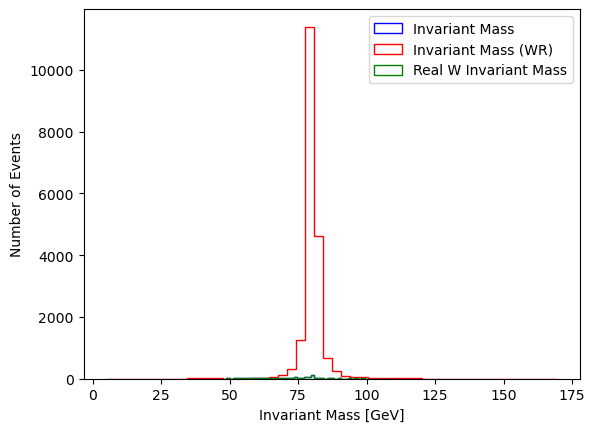

In [38]:
import pylhe
import vector
import math

# 1) LHE 파일 열기
lhe_path = "/data6/Users/snuintern1/tbchannel/gen_for_tb_LRSM/condorfiles/LO_top_wr_decay/result_WR6500_N1000/cmsgrid_final.lhe"    # 실제 경로로 바꿔주세요


# 2) 결과를 저장할 리스트
WR_inv_masses = []
WL_inv_masses = []
real_W_inv_masses = []
realW =[]
for event in pylhe.read_lhe_with_attributes(lhe_file):
    # (A) W 보존자 담을 변수 초기화
    realW_vec = None

    # udsc status=1 쿼크 리스트 초기화
    quarks = []

    for p in event.particles:
        # W boson PDG ID = ±24
        if abs(p.id) == 24:
            # 바로 4-벡터 하나만 저장
            realW_vec = vector.obj(px=p.px, py=p.py, pz=p.pz, E=p.e)

        # final-state udsc 쿼크
        if p.status == 1 and abs(p.id) in (1,2,3,4):
            quarks.append(vector.obj(px=p.px, py=p.py, pz=p.pz, E=p.e))

    # (B) realW_vec 가 있으면 mass 저장
    if realW_vec is not None:
        real_W_inv_masses.append(realW_vec.mass)
    else:
        real_W_inv_masses.append(float('nan'))

    # (C) WL/WR 구분 없이 quarks 두 개 이상이면 합성 mass
    if len(quarks) >= 2:
        total = quarks[0] + quarks[1]
        # status=1 udsc 쿼크 합성 inv mass → WR or WL 리스트에 각각 append
        if realW_vec is not None:
            WL_inv_masses.append(total.mass)
        else:
            WR_inv_masses.append(total.mass)
    else:
        # 둘 다 quarks < 2 인 경우
        if realW_vec is not None:
            WL_inv_masses.append(float('nan'))
        else:
            WR_inv_masses.append(float('nan'))

plt.hist(WL_inv_masses, bins=50, histtype='step', color='blue', label='Invariant Mass')
plt.hist(WR_inv_masses, bins=50, histtype='step', color='red', label='Invariant Mass (WR)')
plt.hist(real_W_inv_masses, bins=50, histtype='step', color='green', label='Real W Invariant Mass')
plt.legend()
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Number of Events')

Text(0, 0.5, 'Number of Events')

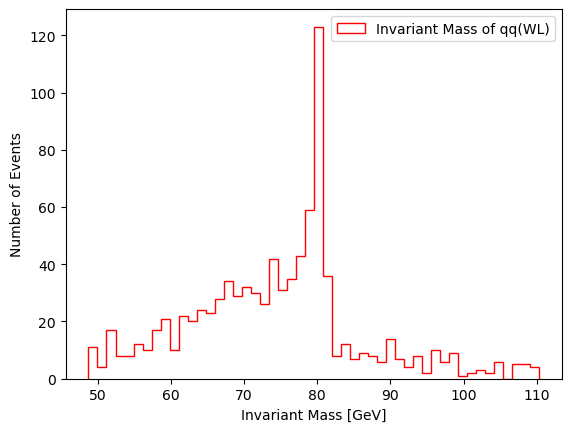

In [65]:
plt.hist(WL_inv_masses, bins=50, histtype='step', color='red', label='Invariant Mass of qq(WL)')
#plt.hist(WR_inv_masses, bins=500, histtype='step', color='green', label='Invariant Mass of qq(WR)')
#plt.hist(real_W_inv_masses, bins=50, histtype='step', color='red', label='Real WL Mass')
plt.legend()
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Number of Events')